In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso,ElasticNet
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import confusion_matrix, mean_squared_error
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import warnings
from sklearn.metrics import mean_squared_error
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score, train_test_split,learning_curve,cross_val_predict
from sklearn import linear_model
from sklearn import metrics
import seaborn as sns
import os
from scipy.stats import pearsonr
from matplotlib import pyplot
import matplotlib.pyplot as plt
import sklearn.metrics as met
import math
import matplotlib

In [13]:
%%javascript
//IPython.OutputArea.auto_scroll_threshold = 99999;   //设置输出>9999时才出现滑动窗口
IPython.OutputArea.prototype._should_scroll = function(){return false}  // 设置不出现滑动窗口 true, auto, false 

<IPython.core.display.Javascript object>

In [14]:
def plot_scatter(y,y_pred,ind):
    
    plt.figure(figsize=(8,8))
    plt.scatter(y,y_pred)
    xp = [min(y_pred), max(y_pred)]
    yp = xp
    plt.plot(xp,yp,'r-')
    plt.xlabel('True'+ind)
    plt.ylabel('Estimated'+ind)
    #plt.title(drug_name)
    plt.text(min(y_pred),max(y_pred), 'pearsonr={:.3f}, pvalue={:.2e}'.format(pearsonr(y_pred,y)[0], pearsonr(y_pred,y)[1]))
    plt.grid()
    #plt.savefig(drug_name+".5fold.png")
    plt.show()

In [15]:
df_exp=pd.read_csv('gdsc_exp.csv',encoding="ISO-8859-1")
print( ' sample of dataset : ', df_exp.shape[0], ', num of genes  : ', df_exp.shape[1] )
df_ic50=pd.read_csv('gdsc_drug.csv')
df_auc=pd.read_csv('gdsc_auc.csv')
genename=df_exp.iloc[:,0]
df_exp=df_exp.iloc[:,1:]
df_exp.index=genename

 sample of dataset :  17737 , num of genes  :  1019


In [39]:
drug_name='17-AAG'
alpha_ic50=[0.0005,0.0009,0.002,0.03,0.04,0.06,0.07,0.09,0.3]
alpha_auc=[0.00005,0.00009,0.0002,0.002,0.003,0.005,0.007,0.01,0.03]

In [15]:
drug_name='AZD-0530'
alpha_ic50=[0.0005,0.0009,0.002,0.03,0.06,0.09,0.1,0.2]
alpha_auc=[0.00003,0.00005,0.0001,0.001,0.003,0.005,0.007,0.01]

In [19]:
drug_name='AZD6244'
alpha_ic50=[0.0005,0.001,0.015,0.03,0.06,0.08,0.1,0.4]
alpha_auc=[0.00005,0.0001,0.001,0.003,0.005,0.007,0.01,0.03]

In [23]:
drug_name='Erlotinib'
alpha_ic50=[0.0005,0.001,0.015,0.03,0.08,0.1,0.4]
alpha_auc=[0.00004,0.0001,0.0002,0.001,0.005,0.007,0.03]

In [27]:
drug_name='Lapatinib'
alpha_ic50=[0.0001,0.0003,0.0005,0.001,0.015,0.03,0.08,0.1,0.4]
alpha_auc=[0.000008,0.00002,0.000035,0.00006,0.0006,0.001,0.005,0.007,0.02]

In [31]:
drug_name='Nilotinib'
alpha_ic50=[0.00059,0.0013,0.017,0.025,0.085,0.11,0.35]
alpha_auc=[0.000035,0.00006,0.0006,0.001,0.005,0.007,0.02]

In [35]:
drug_name='Nutlin-3a'
alpha_ic50=[0.00065,0.0015,0.017,0.023,0.085,0.13,0.35]
alpha_auc=[0.000035,0.00006,0.0006,0.001,0.005,0.007,0.02]

In [39]:
drug_name='PD-0325901'
alpha_ic50=[0.00065,0.0015,0.017,0.06,0.085,0.13,0.35]
alpha_auc=[0.00006,0.00013,0.001,0.005,0.007,0.011,0.03]

In [43]:
drug_name='PD-0332991'
alpha_ic50=[0.00065,0.0015,0.017,0.06,0.085,0.13,0.35]
alpha_auc=[0.000042,0.000098,0.0008,0.004,0.0058,0.0098,0.025]

In [47]:
drug_name='PHA-665752'
alpha_ic50=[0.000005,0.00005,0.0001,0.0003,0.0006,0.002,0.05,0.1]
alpha_auc=[0.0000001,0.000002,0.000005,0.000013,0.000027,0.000072,0.002,0.005]

In [51]:
drug_name='PLX4720'
alpha_ic50=[0.0005,0.001,0.003,0.008,0.02,0.05,0.1,0.2]
alpha_auc=[0.000028,0.000053,0.00015,0.0003,0.0009,0.0027,0.0061,0.011]

In [5]:
drug_name='Sorafenib'
alpha_ic50=[0.00015,0.0002,0.0003,0.0005,0.001,0.005,0.05,0.1,0.2]
alpha_auc=[0.0000078,0.000011,0.0000165,0.000028,0.000065,0.00022,0.0025,0.006,0.0135]

In [40]:
com_num=[]
pcc_ic50=[]
pcc_auc=[]

this is prediction for  17-AAG

------------------------------------------

 sample of dataset (IC50):  836 , num of genes  :  17737

 gene num after PCC (per-selection):  10428

This is 2nd selection using EN....alpha= 0.0005

ElasticNet picked 1214 variables and eliminated the other 9214 variables

------------------------------------------

 sample of dataset (AUC):  836 , num of genes  :  17737

 gene num after PCC (per-selection):  10764

This is 2nd selection using EN....alpha= 5e-05

ElasticNet picked 1235 variables and eliminated the other 9529 variables

------------------------------------------

Finding comnon genes....

num of common gene with IC50 and AUC:  757

------------------------------------------
this is ic50 prediction

Find best parma for ic50 prediction by Grid search

{'alpha': 0.3, 'l1_ratio': 0}
Best Scroe(Normalized.MSE): 0.4115 with parameters 
Normalized.MSE (CV) = 0.4115




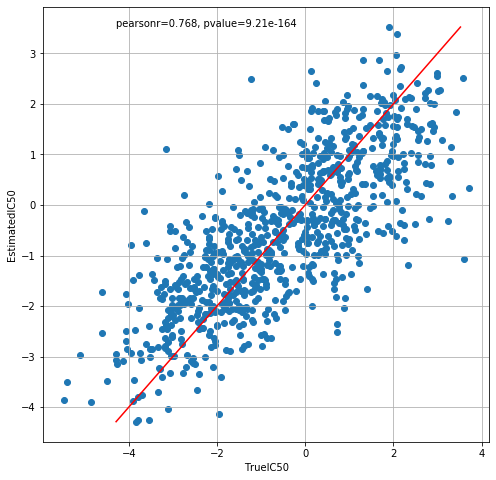

ElasticNet picked 757 variables and eliminated the other 0 variables

__________________________________________

this is auc prediction

Find best parma for auc prediction by Grid search

{'alpha': 0.3, 'l1_ratio': 0}
Best Scroe(Normalized.MSE): 0.4076 with parameters 
Normalized.MSE (CV) = 0.4076




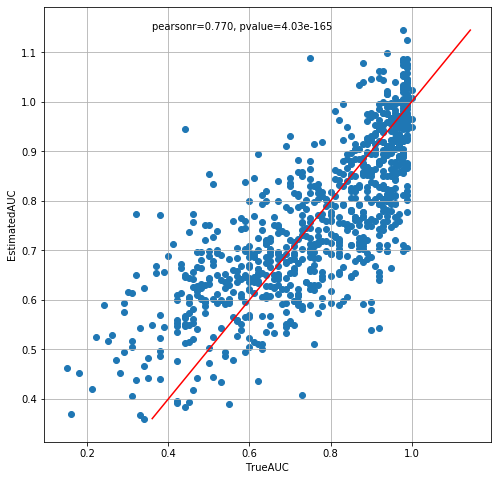

ElasticNet picked 757 variables and eliminated the other 0 variables

this is prediction for  17-AAG

------------------------------------------

 sample of dataset (IC50):  836 , num of genes  :  17737

 gene num after PCC (per-selection):  10428

This is 2nd selection using EN....alpha= 0.0009

ElasticNet picked 1014 variables and eliminated the other 9414 variables

------------------------------------------

 sample of dataset (AUC):  836 , num of genes  :  17737

 gene num after PCC (per-selection):  10764

This is 2nd selection using EN....alpha= 9e-05

ElasticNet picked 1024 variables and eliminated the other 9740 variables

------------------------------------------

Finding comnon genes....

num of common gene with IC50 and AUC:  584

------------------------------------------
this is ic50 prediction

Find best parma for ic50 prediction by Grid search

{'alpha': 0.3, 'l1_ratio': 0}
Best Scroe(Normalized.MSE): 0.381 with parameters 
Normalized.MSE (CV) = 0.381




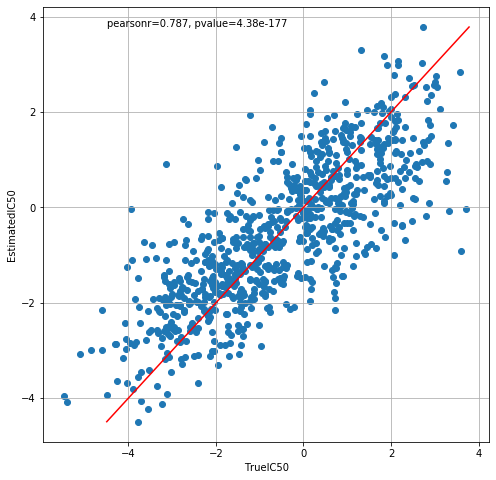

ElasticNet picked 584 variables and eliminated the other 0 variables

__________________________________________

this is auc prediction

Find best parma for auc prediction by Grid search



In [ ]:
for k in range(len(alpha_ic50)):
    print('this is prediction for ',drug_name)
    print()
    print('------------------------------------------')
    print()

    one_drug_ic50=pd.DataFrame([str(x) for x in list(df_ic50['Cell line cosmic identifiers'])])
    one_drug_ic50['ic50']=list(df_ic50[drug_name])
    one_drug_ic50.columns=['id','ic50']
    drug_data_ic50=one_drug_ic50.dropna(axis=0)['ic50']
    drug_data_ic50.index=one_drug_ic50.dropna(axis=0)['id']
    common_id_ic50=list(set(drug_data_ic50.index)&set(df_exp.columns))
    common_id_ic50.sort(reverse=False,key=int)


    exp_ic50=df_exp[common_id_ic50]
    exp_ic50.index=genename
    drug_ic50=drug_data_ic50[common_id_ic50]
    full_df_ic50=(exp_ic50.append(drug_ic50)).T
    X_ic50=full_df_ic50.iloc[:,0:17737]
    y_ic50=full_df_ic50['ic50']

    X_train_ic50,X_test_ic50,y_train_ic50,y_test_ic50=train_test_split(X_ic50,y_ic50,test_size=0.2,random_state=1)
    print( ' sample of dataset (IC50): ', X_ic50.shape[0], ', num of genes  : ', X_ic50.shape[1] )
    print()


    from scipy.stats import pearsonr
    pval=[]

    for n in X_train_ic50.columns:
        cor=pearsonr(X_train_ic50[n],y_train_ic50)[1]
        pval.append(cor)

    #print(len(pval))

    per_ind=[]   
    for j in range(X_train_ic50.shape[1]):        
        if pval[j] < 0.05 :            
            per_ind.append(j)        
        else:
            pass


    ind_ic50=X_ic50.columns[per_ind]
    X_train_ic50_1=X_train_ic50[ind_ic50]
    #print(len(ind))
    print( ' gene num after PCC (per-selection): ', len(ind_ic50) )
    print()
    #     print(X_train_1)




    sel_ic50=ElasticNet(alpha=alpha_ic50[k],l1_ratio=0.5)
    sel_ic50.fit(X_train_ic50_1,y_train_ic50)
    coef_ic50 = pd.Series(sel_ic50.coef_, index = X_train_ic50_1.columns) 
    print('This is 2nd selection using EN....alpha=',alpha_ic50[k])
    print()
    print("ElasticNet picked " + str(sum(coef_ic50 != 0)) + " variables and eliminated the other " +  
              str(sum(coef_ic50 == 0)) + " variables")
    print()
    print('------------------------------------------')
    print()

    EN_features_ic50=(coef_ic50[coef_ic50 != 0]).index
    X_train__ic50_2=X_train_ic50_1[EN_features_ic50]
    #print(EN_features)
    #df=pd.DataFrame(EN_features_ic50)
    
    
    one_drug_auc=pd.DataFrame([str(x) for x in list(df_auc['Cell line cosmic identifiers'])])
    one_drug_auc['auc']=list(df_auc[drug_name])
    one_drug_auc.columns=['id','auc']
    drug_data_auc=one_drug_auc.dropna(axis=0)['auc']
    drug_data_auc.index=one_drug_auc.dropna(axis=0)['id']
    common_id_auc=list(set(drug_data_auc.index)&set(df_exp.columns))
    common_id_auc.sort(reverse=False,key=int)

    #

    exp_auc=df_exp[common_id_auc]
    exp_auc.index=genename
    drug_auc=drug_data_auc[common_id_auc]
    full_df_auc=(exp_auc.append(drug_auc)).T
    X_auc=full_df_auc.iloc[:,0:17737]
    y_auc=full_df_auc['auc']

    X_train_auc,X_test_auc,y_train_auc,y_test_auc=train_test_split(X_auc,y_auc,test_size=0.2,random_state=1)
    print( ' sample of dataset (AUC): ', X_auc.shape[0], ', num of genes  : ', X_auc.shape[1] )
    print()
    



    from scipy.stats import pearsonr
    pval=[]

    for n in X_train_auc.columns:
        cor=pearsonr(X_train_auc[n],y_train_auc)[1]
        pval.append(cor)

    #print(len(pval))

    per_ind=[]   
    for j in range(X_train_auc.shape[1]):        
        if pval[j] < 0.05 :            
            per_ind.append(j)        
        else:
            pass


    ind_auc=X_auc.columns[per_ind]
    X_train_auc_1=X_train_auc[ind_auc]
    #print(len(ind))
    print( ' gene num after PCC (per-selection): ', len(ind_auc) )
    print()
    #     print(X_train_1)




    sel_auc=ElasticNet(alpha=alpha_auc[k],l1_ratio=0.5)
    sel_auc.fit(X_train_auc_1,y_train_auc)
    coef_auc = pd.Series(sel_auc.coef_, index = X_train_auc_1.columns) 
    
    print('This is 2nd selection using EN....alpha=',alpha_auc[k])
    print()
    print("ElasticNet picked " + str(sum(coef_auc != 0)) + " variables and eliminated the other " +  
              str(sum(coef_auc == 0)) + " variables")
    print()
    print('------------------------------------------')

    EN_features_auc=(coef_auc[coef_auc != 0]).index
    X_train_auc_2=X_train_auc_1[EN_features_auc]
    #print(EN_features)
    #df=pd.DataFrame(EN_features_ic50)

    common_gene=list(set(EN_features_ic50)&set(EN_features_auc))
    print()
    print('Finding comnon genes....')
    print()
    print( 'num of common gene with IC50 and AUC: ',len(common_gene))
    print()
    print('------------------------------------------')
    
    com_num.append(len(common_gene))
       #ccle
    NCV=5
    print('this is ic50 prediction')
    print()
    print('Find best parma for ic50 prediction by Grid search')
    print()
    
    param_grid={'alpha':[0.00001,0.0001,0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,3,4,5,10,20,30,50,100],'l1_ratio':[0]}

    regressor=ElasticNet()
    reg = GridSearchCV(regressor, param_grid, cv=NCV, scoring='neg_mean_squared_error', iid=False)
    reg.fit(X_ic50[common_gene],y_ic50)

    best_param=reg.best_params_
    print(best_param)
    print("Best Scroe(Normalized.MSE): " + str(round(-reg.best_score_/y_ic50.var(),4)) + " with parameters ", end='' )
    print()


    regressor.set_params( **best_param )
    cv_scores = cross_val_score(regressor, X_ic50[common_gene], y_ic50, scoring='neg_mean_squared_error', cv=NCV)
    score = -cv_scores.mean()/y_ic50.var()
    print( "Normalized.MSE (CV) = " + str(round(score,4)) + "\n" )
    print()
    y_pred = cross_val_predict(regressor, X_ic50[common_gene], y_ic50, cv=NCV)
    plot_scatter(y_ic50,y_pred,'IC50')
    pcc_ic50.append(pearsonr(y_pred,y_ic50)[0])


    X_train, X_test, y_train, y_test = train_test_split(X_ic50[common_gene], y_ic50, test_size=0.2, random_state=5)
    regressor.set_params(**best_param)
    regressor.fit(X_train,y_train)

    coef1 = pd.Series(regressor.coef_, index = X_train.columns) 
    print("ElasticNet picked " + str(sum(coef1 != 0)) + " variables and eliminated the other " +  str(sum(coef1 == 0)) + " variables")
    print()
    

    y_pred = regressor.predict(X_test)
    mse = ((y_test - y_pred)**2).mean()
    mse_norm = mse/y_test.var()

    #plot_scatter(y_test,y_pred,'IC50')
    print('__________________________________________')
    print()
    #gdsc
    NCV=5
    print('this is auc prediction')
    print()
    print('Find best parma for auc prediction by Grid search')
    print()
    param_grid={'alpha':[0.00001,0.0001,0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,3,4,5,10,20,30,50,100],'l1_ratio':[0]}

    regressor=ElasticNet()
    reg = GridSearchCV(regressor, param_grid, cv=NCV, scoring='neg_mean_squared_error', iid=False)
    reg.fit(X_auc[common_gene],y_auc)

    best_param=reg.best_params_
    print(best_param)
    print("Best Scroe(Normalized.MSE): " + str(round(-reg.best_score_/y_auc.var(),4)) + " with parameters ", end='' )
    print()


    regressor.set_params( **best_param )
    cv_scores = cross_val_score(regressor, X_auc[common_gene],y_auc, scoring='neg_mean_squared_error', cv=NCV)
    score = -cv_scores.mean()/y_auc.var()
    print( "Normalized.MSE (CV) = " + str(round(score,4)) + "\n" )
    print()
    y_pred = cross_val_predict(regressor, X_auc[common_gene],y_auc, cv=NCV)
    plot_scatter(y_auc,y_pred,'AUC')
    pcc_auc.append(pearsonr(y_pred,y_auc)[0])
    

    X_train, X_test, y_train, y_test = train_test_split(X_auc[common_gene],y_auc, test_size=0.2, random_state=5)
    regressor.set_params(**best_param)
    regressor.fit(X_train,y_train)

    coef1 = pd.Series(regressor.coef_, index = X_train.columns) 
    print("ElasticNet picked " + str(sum(coef1 != 0)) + " variables and eliminated the other " +  str(sum(coef1 == 0)) + " variables")
    print()


    y_pred = regressor.predict(X_test)
    mse = ((y_test - y_pred)**2).mean()
    mse_norm = mse/y_test.var()

    #plot_scatter(y_test,y_pred)



In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(com_num, pcc_ic50, marker='o', mec='r', mfc='w',label='IC50')
plt.plot(com_num, pcc_auc, marker='*', ms=10,label='AUC')
plt.legend(fontsize=18)  # 让图例生效
plt.title(drug_name,fontsize=25)
plt.grid()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Common Gene Number',fontsize=20) #X轴标签
plt.ylabel("PCC",fontsize=20) #Y轴标签
plt.savefig(drug_name+'.jpg',dpi=300)
plt.show()